# Estimating Turnover in Retail Trade

### Capstone Project by Christian Furger 

## Machine Learning - kNN Regression

In this notebook, a kNN regressor is tuned. As a baseline to evaluate the model, turnover one year before is used.
The regressor is tuned once with a dataset ending 2019 (before the coronavirus pandemic) and once with data up until 2020. At the end of this notebook, a quick comparison of the kNN models and the baseline is done. In a final notebook (3.6), the different models are compared with each other.

In [1]:
# Import statements
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation <a name="1"></a>

### 1.1 Import Data <a name="1.1"></a>

In [2]:
# Import datasets to compare the predictions
df2020_pred = pd.read_csv('df2020_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})
df2019_pred = pd.read_csv('df2019_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})

print('df2020_pred:', df2020_pred.shape)
print('df2019_pred:', df2019_pred.shape)

df2020_pred: (43180, 25)
df2019_pred: (37858, 25)


In [3]:
# Load the npz files 2020
with np.load('train_data_2020.npz', allow_pickle=False) as train_2020:
    train_data_2020 = dict(train_2020.items())
with np.load('train_data_rescaled_2020.npz', allow_pickle=False) as train_rescaled_2020:
    train_data_rescaled_2020 = dict(train_rescaled_2020.items())
with np.load('test_data_2020.npz', allow_pickle=False) as test_2020:
    test_data_2020 = dict(test_2020.items())
with np.load('test_data_rescaled_2020.npz', allow_pickle=False) as test_rescaled_2020:
    test_data_rescaled_2020 = dict(test_rescaled_2020.items())
    
# Create X/y arrays
X2020_tr = train_data_2020['features']
X2020_tr_rescaled = train_data_rescaled_2020['features']
y2020_tr = train_data_2020['targets']

X2020_te = test_data_2020['features']
X2020_te_rescaled = test_data_rescaled_2020['features']
y2020_te = test_data_2020['targets']

print('X2020_tr:', X2020_tr.shape)
print('X2020_tr_rescaled:', X2020_tr_rescaled.shape)
print('y2020_tr:', y2020_tr.shape)

print('X2020_te:', X2020_te.shape)
print('X2020_te_rescaled:', X2020_te_rescaled.shape)
print('y2020_te:', y2020_te.shape)

X2020_tr: (100753, 167)
X2020_tr_rescaled: (100753, 167)
y2020_tr: (100753,)
X2020_te: (43180, 167)
X2020_te_rescaled: (43180, 167)
y2020_te: (43180,)


In [4]:
# Load the npz files 2019
with np.load('train_data_2019.npz', allow_pickle=False) as train_2019:
    train_data_2019 = dict(train_2019.items())
with np.load('train_data_rescaled_2019.npz', allow_pickle=False) as train_rescaled_2019:
    train_data_rescaled_2019 = dict(train_rescaled_2019.items())
with np.load('test_data_2019.npz', allow_pickle=False) as test_2019:
    test_data_2019 = dict(test_2019.items())
with np.load('test_data_rescaled_2019.npz', allow_pickle=False) as test_rescaled_2019:
    test_data_rescaled_2019 = dict(test_rescaled_2019.items())
    
# Create X/y arrays
X2019_tr = train_data_2019['features']
X2019_tr_rescaled = train_data_rescaled_2019['features']
y2019_tr = train_data_2019['targets']

X2019_te = test_data_2019['features']
X2019_te_rescaled = test_data_rescaled_2019['features']
y2019_te = test_data_2019['targets']

print('X2019_tr:', X2019_tr.shape)
print('X2019_tr_rescaled:', X2019_tr_rescaled.shape)
print('y2019_tr:', y2019_tr.shape)

print('X2019_te:', X2019_te.shape)
print('X2019_te_rescaled:', X2019_te_rescaled.shape)
print('y2019_te:', y2019_te.shape)

X2019_tr: (88334, 165)
X2019_tr_rescaled: (88334, 165)
y2019_tr: (88334,)
X2019_te: (37858, 165)
X2019_te_rescaled: (37858, 165)
y2019_te: (37858,)


### 1.2 Create Baseline <a name="1.2"></a>

In [5]:
# Compare models with mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE)
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

def RMSE(y, y_pred):
    return np.sqrt(np.mean(np.square(y-y_pred)))

In [6]:
# Baseline 2020: turnover one year before
# Load the npz files
with np.load('y2020_te_baseline.npz', allow_pickle=False) as baseline_2020:
    y2020_baseline = dict(baseline_2020.items())

y2020_te_baseline = y2020_baseline['targets']    

mae_baseline2020 = MAE(np.expm1(y2020_te), np.expm1(y2020_te_baseline))
rmse_baseline2020=RMSE(np.expm1(y2020_te), np.expm1(y2020_te_baseline))
mse_baseline2020 = MSE(y2020_te, y2020_te_baseline)

print('Baseline (2020) MAE (in CHF): {:.2f}'.format(mae_baseline2020))
print('Baseline (2020) RMSE: {:.3f}'.format(rmse_baseline2020))
print('Baseline (2020) MSE: {:.3f}'.format(mse_baseline2020))

Baseline (2020) MAE (in CHF): 3145.04
Baseline (2020) RMSE: 40103.069
Baseline (2020) MSE: 15.322


In [7]:
# Baseline 2019: turnover one year before
# Load the npz files
with np.load('y2019_te_baseline.npz', allow_pickle=False) as baseline_2019:
    y2019_baseline = dict(baseline_2019.items())

y2019_te_baseline = y2019_baseline['targets']    

mae_baseline2019 = MAE(np.expm1(y2019_te), np.expm1(y2019_te_baseline))
rmse_baseline2019=RMSE(np.expm1(y2019_te), np.expm1(y2019_te_baseline))
mse_baseline2019 = MSE(y2019_te, y2019_te_baseline)

print('Baseline (2019) MAE (in CHF): {:.2f}'.format(mae_baseline2019))
print('Baseline (2019) RMSE: {:.3f}'.format(rmse_baseline2019))
print('Baseline (2019) MSE: {:.3f}'.format(mse_baseline2019))

Baseline (2019) MAE (in CHF): 2956.58
Baseline (2019) RMSE: 38434.627
Baseline (2019) MSE: 15.130


In [8]:
# Function to plot predicted vs real values
def plot_prediction(model,df,year,title):

    size=['small','medium','large']
    colors = ['red', 'green', 'blue']

    fig, axes = plt.subplots(1,len(size),figsize=(5*len(size),5))
    fig.suptitle(title+' ('+str(year)+'): Scatter plots of real vs predicted turnover (log)',fontsize=20)

    for i in range(0,3):
        size_df=df[df['Stratum_Size']==i+1]
        axes[i].scatter(np.log1p(size_df['TOV']), np.log1p(size_df['TOV_'+model]), label='', color=colors[i], s=1)
        axes[i].plot([0,14],[0,14], color='black', linewidth=1)

        #obtain a (slope) and b(intercept) of linear regression line
        a, b = np.polyfit(np.log1p(size_df['TOV']), np.log1p(size_df['TOV_'+model]), 1)
        
        # Generate a hundred values between 0 and 14
        x_values = np.linspace(0, 14, num=100)
        # Compute the associate y values
        y_values = a*x_values + b
        
        #add linear regression line to scatterplot          
        axes[i].plot(x_values, y_values, color=colors[i], label='slope: {:.2f}'.format(a))
           
        axes[i].set_title(size[i])
        axes[i].set_xlabel('real')
        axes[i].set_ylabel('predicted')
        axes[i].legend()

    plt.show()

## 2. Model fitting <a name="2"></a>

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Create a k-NN pipeline
knn_estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsRegressor())
])

# Number of components for PCA
n_components = [1,2,5,10,20,50,100]
# Number of neighbors for kNN
n_neighbors = np.arange(1, 21, step=1)
# Weight function for kNN
weights = ['uniform', 'distance']
# Power parameter for the Minkowski metric
p = [1, 2]
# Algorithm
algorithm = ['auto', 'kd_tree']

# Create the random grid
random_grid = {'pca__n_components': n_components,
               'knn__n_neighbors': n_neighbors,
               'knn__weights': weights,
               'knn__p': p,
               'knn__algorithm': algorithm}
pprint(random_grid)

{'knn__algorithm': ['auto', 'kd_tree'],
 'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
 'knn__p': [1, 2],
 'knn__weights': ['uniform', 'distance'],
 'pca__n_components': [1, 2, 5, 10, 20, 50, 100]}


### 2.1 Dataset ending 2020 <a name="2.1"></a>

First, let's try to find the optimal parameters of the model with a random search over a grid of values.

In [10]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random_2020 = RandomizedSearchCV(estimator = knn_estimator, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
knn_random_2020.fit(X2020_tr, y2020_tr)

knn_random_2020.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 70.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 140.6min finished


{'pca__n_components': 10,
 'knn__weights': 'distance',
 'knn__p': 1,
 'knn__n_neighbors': 11,
 'knn__algorithm': 'kd_tree'}

In [11]:
# Collect results in a DataFrame
knn_rand_2020 = pd.DataFrame({
    'comp': knn_random_2020.cv_results_['param_pca__n_components'],
    'neigh': knn_random_2020.cv_results_['param_knn__n_neighbors'],
    'weights': knn_random_2020.cv_results_['param_knn__weights'],
    'p': knn_random_2020.cv_results_['param_knn__p'],    
    'algorithm': knn_random_2020.cv_results_['param_knn__algorithm'],
    #'mean_tr': knn_random_2020.cv_results_['mean_train_score'],
    'mean_te': knn_random_2020.cv_results_['mean_test_score'],
    'std_te': knn_random_2020.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 3 validation folds
knn_rand_2020.sort_values(by='mean_te', ascending=False).head(10)

,comp,neigh,weights,p,algorithm,mean_te,std_te
70,10,11,distance,1,kd_tree,0.921489,0.001525
55,10,12,distance,1,auto,0.921272,0.001724
97,10,7,distance,2,auto,0.919363,0.001073
64,10,20,distance,1,auto,0.918513,0.001414
92,10,7,uniform,1,kd_tree,0.917392,0.001836
61,10,8,uniform,1,auto,0.917130,0.001563
62,5,20,distance,1,kd_tree,0.914321,0.001016
1,10,4,uniform,2,auto,0.914041,0.001857
84,10,4,uniform,2,kd_tree,0.913953,0.000924
68,5,12,distance,2,auto,0.913938,0.001535


Now, let's finetune the parameters of the model.

In [12]:
# Create a second cross-validation object for fine-tuning
grid2020 = {
    'pca__n_components': np.arange(8, 13, step=1),
    'knn__n_neighbors': np.arange(9, 14, step=1),  
    'knn__weights': ['distance'],    
    'knn__p': [1],
    'knn__algorithm': ['auto']
}
knn_grid_cv2020 = GridSearchCV(knn_estimator, grid2020, cv=5, refit=True, return_train_score=True, verbose=2, n_jobs = -1)

# Fit kNN estimator
knn_grid_cv2020.fit(X2020_tr, y2020_tr)

# Collect results in a DataFrame
knn_results2020 = pd.DataFrame({
    'comp': knn_grid_cv2020.cv_results_['param_pca__n_components'],
    'neigh': knn_grid_cv2020.cv_results_['param_knn__n_neighbors'],
    'weights': knn_grid_cv2020.cv_results_['param_knn__weights'],
    'p': knn_grid_cv2020.cv_results_['param_knn__p'],
    'algorithm': knn_grid_cv2020.cv_results_['param_knn__algorithm'],
    #'mean_tr': knn_grid_cv2020.cv_results_['mean_train_score'],
    'mean_te': knn_grid_cv2020.cv_results_['mean_test_score'],
    'std_te': knn_grid_cv2020.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
knn_results2020.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  6.4min finished


,comp,neigh,weights,p,algorithm,mean_te,std_te
11,9,11,distance,1,auto,0.924927,0.002022
12,10,11,distance,1,auto,0.924902,0.001618
2,10,9,distance,1,auto,0.924888,0.001687
6,9,10,distance,1,auto,0.924785,0.002061
16,9,12,distance,1,auto,0.924661,0.001780
13,11,11,distance,1,auto,0.924520,0.002005
7,10,10,distance,1,auto,0.924476,0.001878
0,8,9,distance,1,auto,0.924461,0.001760
21,9,13,distance,1,auto,0.924388,0.001867
17,10,12,distance,1,auto,0.924367,0.001979


In [13]:
# Show best estimator
knn_grid_cv2020.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('knn',
                 KNeighborsRegressor(n_neighbors=11, p=1, weights='distance'))])

Let's fit a kNN regression, calculate the predictions for the test set and calculate the model accuracy.

In [14]:
# Create and fit kNN regression
kNN2020 = knn_grid_cv2020.best_estimator_
kNN2020.fit(X2020_tr, y2020_tr)

# Calculate predictions
y_pred_kNN2020 = kNN2020.predict(X2020_te) # Predictions for test data

# Calculate model accuracy
mae_kNN2020 = MAE(np.expm1(y2020_te), np.expm1(y_pred_kNN2020))
rmse_kNN2020=RMSE(np.expm1(y2020_te), np.expm1(y_pred_kNN2020))
mse_kNN2020 = MSE(y2020_te, y_pred_kNN2020)

# Export model accuracy
kNN2020=pd.DataFrame([['kNN', '{:.3f}'.format(mae_kNN2020), '{:.3f}'.format(rmse_kNN2020), '{:.3f}'.format(mse_kNN2020)]],
                 columns=['Model', 'MAE', 'RMSE', 'MSE'])
kNN2020.to_csv("kNN2020.csv", encoding='utf-8', index=False)
kNN2020.head()

,Model,MAE,RMSE,MSE
0,kNN,347.223,3772.601,0.241


In [15]:
# Add prediction to dataset
df2020_pred['TOV_kNN'] = np.expm1(y_pred_kNN2020).tolist()

### 2.2 Dataset ending 2019 <a name="2.2"></a>

First, let's try to find the optimal parameters of the model with a random search over a grid of values.

In [16]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random_2019 = RandomizedSearchCV(estimator = knn_estimator, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
knn_random_2019.fit(X2019_tr, y2019_tr)

knn_random_2019.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 58.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 108.0min finished


{'pca__n_components': 10,
 'knn__weights': 'distance',
 'knn__p': 1,
 'knn__n_neighbors': 11,
 'knn__algorithm': 'kd_tree'}

In [17]:
# Collect results in a DataFrame
knn_rand_2019 = pd.DataFrame({
    'comp': knn_random_2019.cv_results_['param_pca__n_components'],
    'neigh': knn_random_2019.cv_results_['param_knn__n_neighbors'],
    'weights': knn_random_2019.cv_results_['param_knn__weights'],
    'p': knn_random_2019.cv_results_['param_knn__p'],    
    'algorithm': knn_random_2019.cv_results_['param_knn__algorithm'],
    #'mean_tr': knn_random_2019.cv_results_['mean_train_score'],
    'mean_te': knn_random_2019.cv_results_['mean_test_score'],
    'std_te': knn_random_2019.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 3 validation folds
knn_rand_2019.sort_values(by='mean_te', ascending=False).head(10)

,comp,neigh,weights,p,algorithm,mean_te,std_te
70,10,11,distance,1,kd_tree,0.934540,0.003477
55,10,12,distance,1,auto,0.933551,0.003869
97,10,7,distance,2,auto,0.932922,0.003603
64,10,20,distance,1,auto,0.930940,0.004044
92,10,7,uniform,1,kd_tree,0.929662,0.004140
84,10,4,uniform,2,kd_tree,0.929323,0.003637
61,10,8,uniform,1,auto,0.928657,0.004353
1,10,4,uniform,2,auto,0.928391,0.003850
62,5,20,distance,1,kd_tree,0.926793,0.004141
68,5,12,distance,2,auto,0.926433,0.003429


Now, let's finetune the parameters of the model.

In [18]:
# Create a second cross-validation object for fine-tuning
grid2019 = {
    'pca__n_components': np.arange(8, 13, step=1),
    'knn__n_neighbors': np.arange(9, 14, step=1),  
    'knn__weights': ['distance'],    
    'knn__p': [1],
    'knn__algorithm': ['kd_tree']
}
knn_grid_cv2019 = GridSearchCV(knn_estimator, grid2019, cv=5, refit=True, return_train_score=True, verbose=True, n_jobs = -1)

# Fit kNN estimator
knn_grid_cv2019.fit(X2019_tr, y2019_tr)

# Collect results in a DataFrame
knn_results2019 = pd.DataFrame({
    'comp': knn_grid_cv2019.cv_results_['param_pca__n_components'],
    'neigh': knn_grid_cv2019.cv_results_['param_knn__n_neighbors'],
    'weights': knn_grid_cv2019.cv_results_['param_knn__weights'],
    'p': knn_grid_cv2019.cv_results_['param_knn__p'],
    'algorithm': knn_grid_cv2019.cv_results_['param_knn__algorithm'],
    #'mean_tr': knn_grid_cv2019.cv_results_['mean_train_score'],
    'mean_te': knn_grid_cv2019.cv_results_['mean_test_score'],
    'std_te': knn_grid_cv2019.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
knn_results2019.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  4.5min finished


,comp,neigh,weights,p,algorithm,mean_te,std_te
6,9,10,distance,1,kd_tree,0.936305,0.004147
11,9,11,distance,1,kd_tree,0.936190,0.004560
16,9,12,distance,1,kd_tree,0.935995,0.004361
5,8,10,distance,1,kd_tree,0.935950,0.004167
21,9,13,distance,1,kd_tree,0.935834,0.004507
7,10,10,distance,1,kd_tree,0.935771,0.004561
2,10,9,distance,1,kd_tree,0.935727,0.004609
20,8,13,distance,1,kd_tree,0.935663,0.004091
1,9,9,distance,1,kd_tree,0.935660,0.004278
15,8,12,distance,1,kd_tree,0.935649,0.004351


In [19]:
# Show best estimator
knn_grid_cv2019.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('knn',
                 KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, p=1,
                                     weights='distance'))])

Let's fit a kNN regression to the data until 2019, calculate the predictions for the test set and calculate the model accuracy.

In [20]:
# Create and fit kNN regression
kNN2019 = knn_grid_cv2019.best_estimator_
kNN2019.fit(X2019_tr, y2019_tr)

# Calculate predictions
y_pred_kNN2019 = kNN2019.predict(X2019_te) # Predictions for test data

# Calculate model accuracy
mae_kNN2019 = MAE(np.expm1(y2019_te), np.expm1(y_pred_kNN2019))
rmse_kNN2019=RMSE(np.expm1(y2019_te), np.expm1(y_pred_kNN2019))
mse_kNN2019 = MSE(y2019_te, y_pred_kNN2019)

# Export model accuracy
kNN2019=pd.DataFrame([['kNN', '{:.3f}'.format(mae_kNN2019), '{:.3f}'.format(rmse_kNN2019), '{:.3f}'.format(mse_kNN2019)]],
                 columns=['Model', 'MAE', 'RMSE', 'MSE'])
kNN2019.to_csv("kNN2019.csv", encoding='utf-8', index=False)
kNN2019.head()

,Model,MAE,RMSE,MSE
0,kNN,330.000,4211.801,0.214


In [21]:
# Add prediction to dataset
df2019_pred['TOV_kNN'] = np.expm1(y_pred_kNN2019).tolist()

### 2.3 Model comparison <a name="2.3"></a>

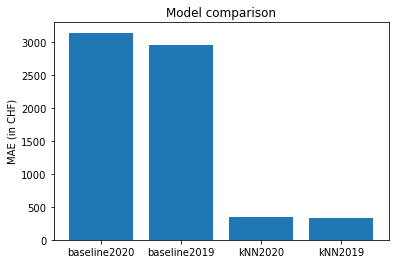

In [22]:
# Comparison
mae_values = [mae_baseline2020, mae_baseline2019, mae_kNN2020, mae_kNN2019]
titles = ['baseline2020', 'baseline2019', 'kNN2020', 'kNN2019']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('Model comparison')
plt.ylabel('MAE (in CHF)')
plt.show()

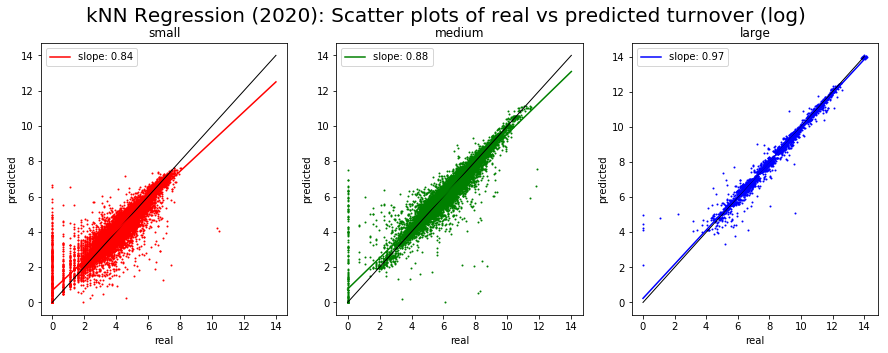

In [23]:
plot_prediction('kNN',df2020_pred,2020,'kNN Regression')

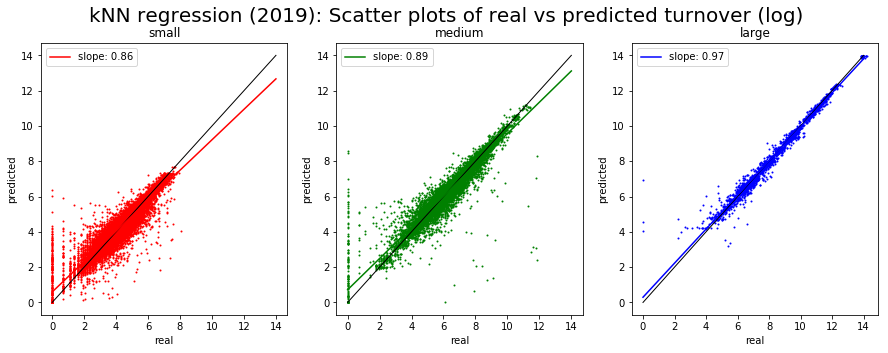

In [24]:
plot_prediction('kNN',df2019_pred,2019,'kNN regression')

In [25]:
# Exporting datasets with predictions
df2020_pred.to_csv("df2020_pred.csv", encoding='utf-8', index=True)
df2019_pred.to_csv("df2019_pred.csv", encoding='utf-8', index=True)

The kNN regression seems to give quite good results, especially for the large enterprises. The model seems to be less able to predict turnover of 0. This might be due to the log1p transformation. The model with data only until 2019 gives only slightly better results than the model using all the data, so the model seems to capture well the effects of the coronavirus pandemic. 